Importing Required Libraries

In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras # deep learning model
import matplotlib.pyplot as plt # for plotting graphs
from PIL import Image # Image processing and viewing
import os
from tensorflow.keras.optimizers import RMSprop # optimizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator # ImageDataGenerator for data augmentation 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



#../input/kermany2018/oct2017/OCT2017 /train/NORMAL/NORMAL-2627129-8.jpeg
# Any results you write to the current directory are saved as output.

Visualization of Data in dataset

-> Given below is Normal Retina condition 


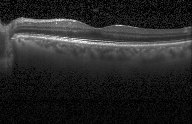

-> Types of diseases are : 
  1) Multiple Drusen in early AMD


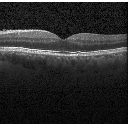

  2) Choroidal Neovascularization


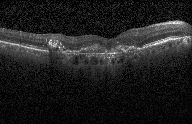

  3) Diabetic Macular Edema


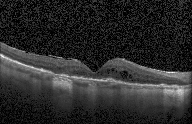

In [24]:
print("-> Given below is Normal Retina condition ")
img = Image.open('../input/kermany2018/oct2017/OCT2017 /train/NORMAL/NORMAL-1004480-5.jpeg')
img_width = int(img.width/4)
img_height = int(img.height/4)
img = img.resize((img_width,img_height))
display(img)

print("-> Types of diseases are : ")
img = Image.open('../input/kermany2018/oct2017/OCT2017 /train/DRUSEN/DRUSEN-100580-1.jpeg')
img_width = int(img.width/4)
img_height = int(img.height/4)
img = img.resize((img_width,img_height))
print("  1) Multiple Drusen in early AMD")
display(img)

img = Image.open('../input/kermany2018/oct2017/OCT2017 /train/CNV/CNV-1016042-10.jpeg')
img_width = int(img.width/4)
img_height = int(img.height/4)
img = img.resize((img_width,img_height))
print("  2) Choroidal Neovascularization")
display(img)

img = Image.open('../input/kermany2018/oct2017/OCT2017 /train/DME/DME-1083927-10.jpeg')
img_width = int(img.width/4)
img_height = int(img.height/4)
img = img.resize((img_width,img_height))
print("  3) Diabetic Macular Edema")
display(img)


Image Data Generator for Training and Validation Data

In [32]:
train_dir = '../input/kermany2018/oct2017/OCT2017 /train/'

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size =(300,int(img.height*300/img.width)),
    color_mode = 'grayscale',
    class_mode = 'categorical' ,
    batch_size = 36,
    )


Found 83484 images belonging to 4 classes.


In [33]:
val_dir = '../input/kermany2018/oct2017/OCT2017 /val/'

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size =(300,int(img.height*300/img.width)),
    color_mode = 'grayscale',
    class_mode = 'categorical' ,
    batch_size = 32,
    )

Found 32 images belonging to 4 classes.


Deep Learning Model

In [39]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(300,int(img.height*300/img.width),1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax')   
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 298, 191, 64)      640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 149, 95, 64)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 147, 93, 32)       18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 46, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 107456)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               13754496  
_________________________________________________________________
dense_3 (Dense)              (None, 4)                

Compile the model

In [40]:
model.compile(
    loss='categorical_crossentropy' ,
    optimizer = RMSprop(lr=0.001) ,
    metrics = ['acc'] ,
    )

Calculate the accuracy for traing and Validation Datasets 

In [41]:
data = model.fit_generator(
    train_generator ,
    epochs = 25 ,
    validation_data = train_generator ,
    verbose = 2,
    )

Train for 1 steps, validate for 1 steps
Epoch 1/15
1/1 - 4s - loss: 1.3872 - acc: 0.2812 - val_loss: 2.0391 - val_acc: 0.4688
Epoch 2/15
1/1 - 3s - loss: 2.0391 - acc: 0.4688 - val_loss: 8.0430 - val_acc: 0.3750
Epoch 3/15
1/1 - 3s - loss: 8.0430 - acc: 0.3750 - val_loss: 2.6844 - val_acc: 0.4062
Epoch 4/15
1/1 - 3s - loss: 2.6844 - acc: 0.4062 - val_loss: 1.1833 - val_acc: 0.4688
Epoch 5/15
1/1 - 3s - loss: 1.1833 - acc: 0.4688 - val_loss: 1.0259 - val_acc: 0.5000
Epoch 6/15
1/1 - 3s - loss: 1.0259 - acc: 0.5000 - val_loss: 0.6475 - val_acc: 0.9375
Epoch 7/15
1/1 - 3s - loss: 0.6475 - acc: 0.9375 - val_loss: 0.4015 - val_acc: 0.9688
Epoch 8/15
1/1 - 3s - loss: 0.4015 - acc: 0.9688 - val_loss: 2.3709 - val_acc: 0.3750
Epoch 9/15
1/1 - 3s - loss: 2.3709 - acc: 0.3750 - val_loss: 1.1300 - val_acc: 0.6875
Epoch 10/15
1/1 - 3s - loss: 1.1300 - acc: 0.6875 - val_loss: 0.4033 - val_acc: 1.0000
Epoch 11/15
1/1 - 3s - loss: 0.4033 - acc: 1.0000 - val_loss: 0.1913 - val_acc: 1.0000
Epoch 12/15


Visualization of Results

<Figure size 432x288 with 0 Axes>

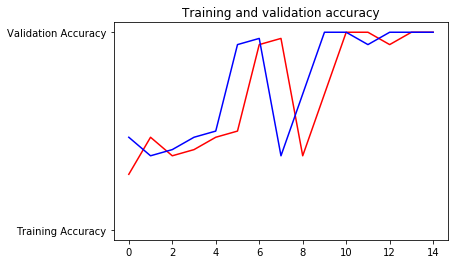

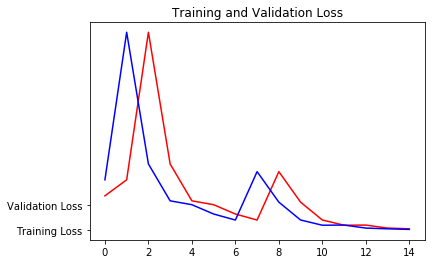

<Figure size 432x288 with 0 Axes>

In [44]:
%matplotlib inline

acc=data.history['acc']
val_acc=data.history['val_acc']
loss=data.history['loss']
val_loss=data.history['val_loss']

epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss ,'r','Training Loss')
plt.plot(epochs, val_loss, 'b','Validation Loss')
plt.title('Training and Validation Loss')
plt.figure()